<a id='top'></a>

# Gig Deliveries Case Study
### By Edd Webster
Notebook last updated: 14/12/2019

![title](images/gigdeliverieslogo.png)

Click [here](#section4) to jump straight to the Exploratory Data Analysis section and skip the [Task Brief](#section2) and [Data Sources](#section3) sections. Or you can click [here](#section5) to jump straight to the Conclusion.

## Introduction
This notebook is an Exploratory Data Analysis (EDA) of employee data for a fictional [Gig Economy](https://en.wikipedia.org/wiki/Gig_economy) delivery business - Gig Deliveries, analysing the performance of a new, incentivised referral scheme, 'ERP', targeting current freelance [employees](https://en.wikipedia.org/wiki/Gig_worker) at the company. This EDA aims to determine whether or not the ERP scheme has been successful. The dataset provided is explored and the findings summarised.

For more information about this notebook and the author, I'm available through all the following channels:
*    [EddWebster.com](https://www.eddwebster.com/),
*    edd.j.webster@gmail.com,
*    [LinkedIn.com/in/eddwebster](https://www.linkedin.com/in/eddwebster/), and
*    [GitHub/eddwebster](https://github.com/eddwebster/).

The accompanying GitHub repository for this notebook can be found [here](https://github.com/eddwebster/gigdeliverieseda) and a static version of this notebook can be found [here](https://nbviewer.jupyter.org/github/eddwebster/gigdeliverieseda/blob/master/Gig%20Deliveries%20Case%20Study.ipynb).

## Notebook Contents
1.    [Setup](#section1)
2.    [Task Brief](#section2)
3.    [Data Source](#section3)
4.    [Exploratory Data Analysis](#section4)
5.    [Summary and Conclusion](#section5)
6.    [Next Steps](#section6)
7.    [Bibliography](#section7)

<a id='section1'></a>

## 1. Notebook Setup

This notebook uses [Python 3](https://docs.python.org/3.7/) and requires the following libraries:
*    [IPython](http://ipython.org/),
*    [NumPy](http://www.numpy.org/),
*    [pandas](http://pandas.pydata.org/), and
*    [Seaborn](https://seaborn.pydata.org/).

In [31]:
# Import modules

# Python ≥3.5 (ideally)
import sys
assert sys.version_info >= (3, 5)

# Data preprocessing
import numpy as np
import pandas as pd
import os

# Plotting figures
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno    # pip install missingno if you don't have it

# Display in Jupyter
from IPython.display import Image
from IPython.core.display import HTML

# Ignore warnings
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

print("Setup Complete")

Setup Complete


<a id='section2'></a>

## 2. Task Brief
The following brief sets out the task to be completed. Click [here](#section3) to skip to the next section where the proper coding begins. 

>### Background
>At Gig Deliveries, we want to understand our employees in as much detail as possible. As we attempt to build and maintain the optimal employee fleet, we utilise a series of marketing channels and schemes to attract new workers. One of these channels is a new incentivised referral scheme, known as the 'Employee Referral Programme' or 'ERP', targeting current employees associated with the company.
>
>### The Task
>A senior manager has asked you to analyse the performance of the scheme and determine if it is successful. They have asked you to take them through your findings later that day. Analyse the dataset provided and summarise your findings.
>
>**The overarching question you should answer with your analysis is:
>“Is the ERP scheme successful, and why have you reached that conclusion?”**
>*    You should define what success is
>*    How has ERP scheme performed compared with other channels?
>*    How does employee performance / behaviour vary between the channels?
>
>
>Summarise your findings
>*    Your summary should logically set out so the reader can follow your main findings and any conclusions you have arrived at
>*    It should make appropriate use of visualisations to convey your findings
>
>*Note - We have provided a clean data set and you do not need to do any data cleaning.*

<a id='section3'></a>

## 3. Data Source

### Overview
The fictional sample of weekly data for each employee for their first 24 weeks with Gig Deliveries. The dataset is one row per employee per week - each employee has 25 rows of data (includes week 0 which is the week they joined).

### Data Dictionary
The dataset has nineteen features (columns) with the following definitions and data types:

| Variable     | Data type    | Definition     |
|------|-----|-----|
| `EMPLOYEE_ID`    | int64     | a unique employee identifier     |
| `LOCATION`    | objects     | the city the employee applied in     |
| `APPLICATION_DATE`    | object     | the date the employee applied to work for Gig Deliveries     |
| `APPLICATION_APPROVED_DATE`    | object     | the date that the employee application was approved     |
| `FIRST_WORK_DATE`    | object     | the date of the employee’s first shift     |
| `ACQUISITION_CHANNEL`    | object     | the last touch marketing channel recorded for the employee/applicant     |
| `VEHICLE_TYPE`    | object     | the type of vehicle the employee uses     |
| `WEEKS_SINCE_FIRST_WORK`    | object     | the number of weeks since the first_work_date, from 0-24     |
| `EMPLOYEE_ACTIVE`    | bool     | Boolean flag if the employee worked in that week or not     |
|`HOURS_WORKED`    | float64     | the number of hours worked by the employee that week     |
| `HOURS_WORKED_CUMULATIVE`    | float64     | the cumulative number of hours worked by the employee to date     |
| `ORDERS_DELIVERED`    | float64     | the number of orders delivered by the employee that week     |
| `ORDERS_DELIVERED_CUMULATIVE`    | float64     | the cumulative number of orders delivered by the employee to date     |
| `THROUGHPUT`    | float64     | the orders per hour (orders / hours) of the employee that week     |
| `THROUGHPUT_CUMULATIVE_REFERRALS`    | float64     | the cumulative throughput of the employee to date     |
| `REFERRALS`    | float64     | the number of referrals made by that employee that week     |
| `REFERRALS_CUMULATIVE`    | float64     | the cumulative number of referrals made by that employee to date     |
| `SUCCESSFUL_REFERRALS`    | float64     | the number of successful (approved) referrals made by the employee that week     |
| `SUCCESSFUL_REFERRAKS_CUMULATIVE`    | float64     | the cumulative number of successful (approved) referrals made by the employee to date     |

### Data Import
First, let's import the CSV file provided, 'erp_dataset.csv', to this Jupyter notebook as a Pandas DataFrame.

In [32]:
# Import CSV to a Pandas DataFrame
filepath = "data/erp_dataset.csv"
df_raw = pd.read_csv(filepath)

### Initial Data Handling
Let's quality of the dataset by looking first and last rows, using the [head()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html) and [tail()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.tail.html) methods.

In [33]:
# Display the first 5 rows of the raw DataFrame, df_raw
df_raw.head()

,EMPLOYEE_ID,LOCATION,APPLICATION_DATE,APPLICATION_APPROVED_DATE,FIRST_WORK_DATE,ACQUISITION_CHANNEL,VEHICLE_TYPE,WEEKS_SINCE_FIRST_WORK,EMPLOYEE_ACTIVE,HOURS_WORKED,HOURS_WORKED_CUMULATIVE,ORDERS_DELIVERED,ORDERS_DELIVERED_CUMULATIVE,THROUGHPUT,THROUGHPUT_CUMULATIVE,REFERRALS,REFERRALS_CUMULATIVE,SUCCESSFUL_REFERRALS,SUCCESSFUL_REFERRALS_CUMULATIVE
0,1864,New York,05/03/2017,31/03/2017,03/04/2017,Digital,Scooter / Motorcycle,0,True,18.918334,18.918334,44.0,44.0,2.325786,2.325786,NaN,NaN,NaN,NaN
1,1864,New York,05/03/2017,31/03/2017,03/04/2017,Digital,Scooter / Motorcycle,1,True,33.625274,52.543608,78.0,122.0,2.319684,2.321881,NaN,NaN,NaN,NaN
2,1864,New York,05/03/2017,31/03/2017,03/04/2017,Digital,Scooter / Motorcycle,2,True,10.539444,63.083052,30.0,152.0,2.846450,2.409522,NaN,NaN,NaN,NaN
3,1864,New York,05/03/2017,31/03/2017,03/04/2017,Digital,Scooter / Motorcycle,3,True,10.268887,73.351939,38.0,190.0,3.700498,2.590252,NaN,NaN,NaN,NaN
4,1864,New York,05/03/2017,31/03/2017,03/04/2017,Digital,Scooter / Motorcycle,4,True,17.463331,90.815270,58.0,248.0,3.321245,2.730818,NaN,NaN,NaN,NaN


In [34]:
# Display the last 5 rows of the raw DataFrame, df_raw
df_raw.tail()

,EMPLOYEE_ID,LOCATION,APPLICATION_DATE,APPLICATION_APPROVED_DATE,FIRST_WORK_DATE,ACQUISITION_CHANNEL,VEHICLE_TYPE,WEEKS_SINCE_FIRST_WORK,EMPLOYEE_ACTIVE,HOURS_WORKED,HOURS_WORKED_CUMULATIVE,ORDERS_DELIVERED,ORDERS_DELIVERED_CUMULATIVE,THROUGHPUT,THROUGHPUT_CUMULATIVE,REFERRALS,REFERRALS_CUMULATIVE,SUCCESSFUL_REFERRALS,SUCCESSFUL_REFERRALS_CUMULATIVE
113520,103776,New York,28/03/2017,07/04/2017,08/04/2017,Referral,Scooter / Motorcycle,20,False,NaN,283.251111,NaN,638.0,NaN,2.252418,NaN,NaN,NaN,NaN
113521,103776,New York,28/03/2017,07/04/2017,08/04/2017,Referral,Scooter / Motorcycle,21,True,2.080833,285.331944,4.0,642.0,1.922307,2.250011,NaN,NaN,NaN,NaN
113522,103776,New York,28/03/2017,07/04/2017,08/04/2017,Referral,Scooter / Motorcycle,22,True,0.664722,285.996666,2.0,644.0,3.008777,2.251775,NaN,NaN,NaN,NaN
113523,103776,New York,28/03/2017,07/04/2017,08/04/2017,Referral,Scooter / Motorcycle,23,False,0.000000,285.996666,NaN,644.0,NaN,2.251775,NaN,NaN,NaN,NaN
113524,103776,New York,28/03/2017,07/04/2017,08/04/2017,Referral,Scooter / Motorcycle,24,False,NaN,285.996666,NaN,644.0,NaN,2.251775,NaN,NaN,NaN,NaN


In [35]:
# Print the shape of the raw DataFrame, df_raw
print(df_raw.shape)

(113525, 19)


The raw DataFrame has:
*    113,525 observations (rows), each observation represents one employee per week, and
*    19 attributes (columns).

In [36]:
# Features (column names) of the raw DataFrame, df_raw
df_raw.columns

Index(['EMPLOYEE_ID', 'LOCATION', 'APPLICATION_DATE',
       'APPLICATION_APPROVED_DATE', 'FIRST_WORK_DATE', 'ACQUISITION_CHANNEL',
       'VEHICLE_TYPE', 'WEEKS_SINCE_FIRST_WORK', 'EMPLOYEE_ACTIVE',
       'HOURS_WORKED', 'HOURS_WORKED_CUMULATIVE', 'ORDERS_DELIVERED',
       'ORDERS_DELIVERED_CUMULATIVE', 'THROUGHPUT', 'THROUGHPUT_CUMULATIVE',
       'REFERRALS', 'REFERRALS_CUMULATIVE', 'SUCCESSFUL_REFERRALS',
       'SUCCESSFUL_REFERRALS_CUMULATIVE'],
      dtype='object')

The dataset has nineteen features (columns):
*    `EMPLOYEE_ID`: a unique employee identifier
*    `LOCATION`: the city the employee applied in
*    `APPLICATION_DATE`: the date the employee applied to work for Gig Deliveries
*    `APPLICATION_APPROVED_DATE`: the date that the employee application was approved
*    `FIRST_WORK_DATE`: 
*    `ACQUISITION_CHANNEL`: the last touch marketing channel recorded for the employee/applicant
*    `VEHICLE_TYPE`: the type of vehicle the employee uses
*    `WEEKS_SINCE_FIRST_WORK`: the number of weeks since the first_work_date, from 0-24
*    `EMPLOYEE_ACTIVE`: Boolean flag if the employee worked in that week or not
*    `HOURS_WORKED`: the number of hours worked by the employee that week
*    `HOURS_WORKED_CUMULATIVE`: the cumulative number of hours worked by the employee to date
*    `ORDERS_DELIVERED`: the number of orders delivered by the employee that week
*    `ORDERS_DELIVERED_CUMULATIVE`: the cumulative number of orders delivered by the employee to date
*    `THROUGHPUT`: the orders per hour (orders / hours) of the employee that week
*    `THROUGHPUT_CUMULATIVE_REFERRALS`: the cumulative throughput of the employee to date
*    `REFERRALS`: the number of referrals made by that employee that week
*    `REFERRALS_CUMULATIVE`: the cumulative number of referrals made by that employee to date
*    `SUCCESSFUL_REFERRALS`: the number of successful (approved) referrals made by the employee in that week
*    `SUCCESSFUL_REFERRALS_CUMULATIVE`: the cumulative number of successful (approved) referrals made by the employee to date

The [dtypes](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dtypes.html) method returns the data types of each attribute in the DataFrame.

In [37]:
# dtypes of the features of the raw DataFrame, df_raw
df_raw.dtypes

EMPLOYEE_ID                          int64
LOCATION                            object
APPLICATION_DATE                    object
APPLICATION_APPROVED_DATE           object
FIRST_WORK_DATE                     object
ACQUISITION_CHANNEL                 object
VEHICLE_TYPE                        object
WEEKS_SINCE_FIRST_WORK               int64
EMPLOYEE_ACTIVE                       bool
HOURS_WORKED                       float64
HOURS_WORKED_CUMULATIVE            float64
ORDERS_DELIVERED                   float64
ORDERS_DELIVERED_CUMULATIVE        float64
THROUGHPUT                         float64
THROUGHPUT_CUMULATIVE              float64
REFERRALS                          float64
REFERRALS_CUMULATIVE               float64
SUCCESSFUL_REFERRALS               float64
SUCCESSFUL_REFERRALS_CUMULATIVE    float64
dtype: object

The [info](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html) method to get a quick description of the data, in particular the total number of rows, and each attribute’s type and number of non-null values.

In [38]:
# Info for the raw DataFrame, df_raw
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113525 entries, 0 to 113524
Data columns (total 19 columns):
EMPLOYEE_ID                        113525 non-null int64
LOCATION                           113525 non-null object
APPLICATION_DATE                   113525 non-null object
APPLICATION_APPROVED_DATE          113525 non-null object
FIRST_WORK_DATE                    113525 non-null object
ACQUISITION_CHANNEL                113525 non-null object
VEHICLE_TYPE                       113525 non-null object
WEEKS_SINCE_FIRST_WORK             113525 non-null int64
EMPLOYEE_ACTIVE                    113525 non-null bool
HOURS_WORKED                       55001 non-null float64
HOURS_WORKED_CUMULATIVE            113525 non-null float64
ORDERS_DELIVERED                   51774 non-null float64
ORDERS_DELIVERED_CUMULATIVE        111362 non-null float64
THROUGHPUT                         51774 non-null float64
THROUGHPUT_CUMULATIVE              111362 non-null float64
REFERRALS           

The [describe](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html) method to show some useful statistics for each numerical column in the DataFrame.

In [39]:
# Description of the raw DataFrame, df_raw, showing some summary statistics for each numberical column in the DataFrame
df_raw.describe()

,EMPLOYEE_ID,WEEKS_SINCE_FIRST_WORK,HOURS_WORKED,HOURS_WORKED_CUMULATIVE,ORDERS_DELIVERED,ORDERS_DELIVERED_CUMULATIVE,THROUGHPUT,THROUGHPUT_CUMULATIVE,REFERRALS,REFERRALS_CUMULATIVE,SUCCESSFUL_REFERRALS,SUCCESSFUL_REFERRALS_CUMULATIVE
count,113525.000000,113525.000000,55001.000000,113525.000000,51774.000000,111362.000000,51774.000000,111362.000000,2409.000000,17068.000000,2409.000000,17068.000000
mean,80873.171989,12.000000,16.333247,117.987786,37.995287,252.875532,2.185034,1.945347,1.077210,2.067495,0.233707,0.396649
std,12798.378932,7.211134,14.652287,166.645993,35.692802,389.403744,0.781561,0.663847,1.717319,5.127942,0.476797,0.801456
min,1864.000000,0.000000,0.000000,0.167500,1.000000,1.000000,0.023303,0.025417,0.000000,0.000000,0.000000,0.000000
25%,70838.000000,6.000000,5.484444,19.801390,12.000000,35.000000,1.696575,1.521931,1.000000,1.000000,0.000000,0.000000
50%,77621.000000,12.000000,11.976390,55.344720,26.000000,104.000000,2.210061,1.993766,1.000000,1.000000,0.000000,0.000000
75%,94220.000000,18.000000,22.985834,143.990280,53.000000,294.000000,2.686744,2.403426,1.000000,2.000000,0.000000,1.000000
max,103776.000000,24.000000,122.296665,2075.802227,284.000000,5046.000000,30.000300,6.326892,37.000000,285.000000,5.000000,28.000000


Next, we will check to see how many missing values we have i.e. the number of NULL values in the dataset, and in what features these missing values are located. This can be plotted nicely using the [missingno](https://pypi.org/project/missingno/) library (pip install missingno).

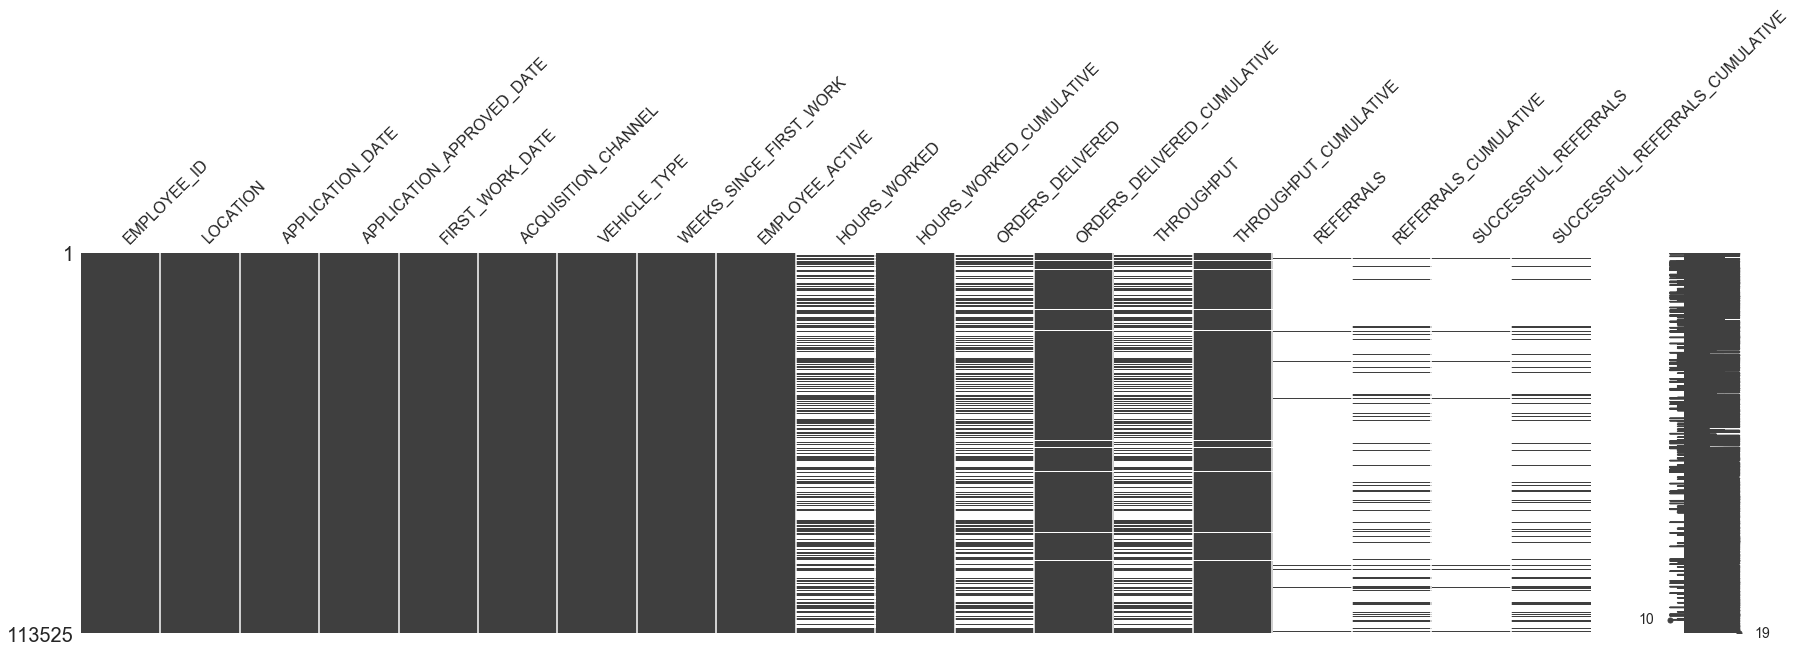

In [40]:
# Plot visualisation of the missing values for each feature of the raw DataFrame, df_raw
msno.matrix(df_raw, figsize = (30, 7))

In [41]:
# Counts of missing values
null_value_stats = df_raw.isnull().sum(axis=0)
null_value_stats[null_value_stats != 0]

HOURS_WORKED                        58524
ORDERS_DELIVERED                    61751
ORDERS_DELIVERED_CUMULATIVE          2163
THROUGHPUT                          61751
THROUGHPUT_CUMULATIVE                2163
REFERRALS                          111116
REFERRALS_CUMULATIVE                96457
SUCCESSFUL_REFERRALS               111116
SUCCESSFUL_REFERRALS_CUMULATIVE     96457
dtype: int64

Even though it is good practice to look at the NULL values in a new dataset, as stated in the brief, the dataset is clean and no data cleaning is required. We therefore will leave null values here.

### Data Wrangling
As stated in the brief, the dataset has 113,525 records in which one each row refers to one employee per week i.e. each of the 4,541 employees has 25 rows of data (including week 0 as the week they joined).

For my analysis, I want to separate the latest version of each employee's data, i.e. week 24, from the previous week's data, to analyse only their total performance of the employee over the 24 week period. This will leave a dataset of 4,541 records, one per employee, each with the total value of the following data points: `WEEKS_SINCE_FIRST_WORK`, `HOURS_WORKED_CUMULATIVE`, `ORDERS_DELIVERED_CUMULATIVE`, `THROUGHPUT_CUMULATIVE_REFERRALS`, `REFERRALS_CUMULATIVE`, and `SUCCESSFUL_REFERRALS_CUMULATIVE`.

To do this, we can take the rows only where `WEEKS_SINCE_FIRST_WORK` is equal to 24 i.e. the final week and create the new Dataframe that we'll be working with, using the standard naming convention `df`.

In [42]:
# Week 24 only of each employee
df = df_raw.loc[df_raw['WEEKS_SINCE_FIRST_WORK'] == 24]

Again we will perform some of the data handling checks that we performed with the raw dataset.

In [43]:
df.head()

,EMPLOYEE_ID,LOCATION,APPLICATION_DATE,APPLICATION_APPROVED_DATE,FIRST_WORK_DATE,ACQUISITION_CHANNEL,VEHICLE_TYPE,WEEKS_SINCE_FIRST_WORK,EMPLOYEE_ACTIVE,HOURS_WORKED,HOURS_WORKED_CUMULATIVE,ORDERS_DELIVERED,ORDERS_DELIVERED_CUMULATIVE,THROUGHPUT,THROUGHPUT_CUMULATIVE,REFERRALS,REFERRALS_CUMULATIVE,SUCCESSFUL_REFERRALS,SUCCESSFUL_REFERRALS_CUMULATIVE
24,1864,New York,05/03/2017,31/03/2017,03/04/2017,Digital,Scooter / Motorcycle,24,True,35.087779,820.883044,70.0,1977.0,1.994997,2.408382,NaN,1.0,NaN,1.0
49,3062,New York,03/10/2016,22/10/2016,30/10/2016,Offline,Bicycle,24,False,NaN,15.555832,NaN,26.0,NaN,1.671399,NaN,NaN,NaN,NaN
74,5276,New York,24/03/2017,31/03/2017,01/04/2017,Organic,Scooter / Motorcycle,24,False,NaN,23.326944,NaN,70.0,NaN,3.000822,NaN,1.0,NaN,0.0
99,9510,New York,05/10/2016,22/10/2016,28/10/2016,Digital,Bicycle,24,False,NaN,74.400552,NaN,97.0,NaN,1.303754,NaN,NaN,NaN,NaN
124,16977,New York,18/03/2017,20/03/2017,24/03/2017,Referral,Bicycle,24,False,NaN,23.710833,NaN,67.0,NaN,2.825713,NaN,NaN,NaN,NaN


In [44]:
df.tail()

,EMPLOYEE_ID,LOCATION,APPLICATION_DATE,APPLICATION_APPROVED_DATE,FIRST_WORK_DATE,ACQUISITION_CHANNEL,VEHICLE_TYPE,WEEKS_SINCE_FIRST_WORK,EMPLOYEE_ACTIVE,HOURS_WORKED,HOURS_WORKED_CUMULATIVE,ORDERS_DELIVERED,ORDERS_DELIVERED_CUMULATIVE,THROUGHPUT,THROUGHPUT_CUMULATIVE,REFERRALS,REFERRALS_CUMULATIVE,SUCCESSFUL_REFERRALS,SUCCESSFUL_REFERRALS_CUMULATIVE
113424,103762,New York,31/03/2017,07/04/2017,08/04/2017,Referral,Scooter / Motorcycle,24,True,19.114722,903.356102,59.0,2259.0,3.086626,2.500675,NaN,NaN,NaN,NaN
113449,103764,New York,20/03/2017,07/04/2017,07/04/2017,Referral,Scooter / Motorcycle,24,False,NaN,216.875004,NaN,321.0,NaN,1.480115,NaN,4.0,NaN,2.0
113474,103774,New York,26/02/2017,07/04/2017,07/04/2017,Organic,Scooter / Motorcycle,24,False,NaN,278.383333,NaN,783.0,NaN,2.812668,NaN,NaN,NaN,NaN
113499,103775,New York,25/03/2017,07/04/2017,07/04/2017,Referral,Scooter / Motorcycle,24,True,23.698056,338.583337,83.0,1107.0,3.502397,3.269505,NaN,5.0,NaN,1.0
113524,103776,New York,28/03/2017,07/04/2017,08/04/2017,Referral,Scooter / Motorcycle,24,False,NaN,285.996666,NaN,644.0,NaN,2.251775,NaN,NaN,NaN,NaN


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4541 entries, 24 to 113524
Data columns (total 19 columns):
EMPLOYEE_ID                        4541 non-null int64
LOCATION                           4541 non-null object
APPLICATION_DATE                   4541 non-null object
APPLICATION_APPROVED_DATE          4541 non-null object
FIRST_WORK_DATE                    4541 non-null object
ACQUISITION_CHANNEL                4541 non-null object
VEHICLE_TYPE                       4541 non-null object
WEEKS_SINCE_FIRST_WORK             4541 non-null int64
EMPLOYEE_ACTIVE                    4541 non-null bool
HOURS_WORKED                       1319 non-null float64
HOURS_WORKED_CUMULATIVE            4541 non-null float64
ORDERS_DELIVERED                   1223 non-null float64
ORDERS_DELIVERED_CUMULATIVE        4464 non-null float64
THROUGHPUT                         1223 non-null float64
THROUGHPUT_CUMULATIVE              4464 non-null float64
REFERRALS                          74 non-null f

In [46]:
df.describe()

,EMPLOYEE_ID,WEEKS_SINCE_FIRST_WORK,HOURS_WORKED,HOURS_WORKED_CUMULATIVE,ORDERS_DELIVERED,ORDERS_DELIVERED_CUMULATIVE,THROUGHPUT,THROUGHPUT_CUMULATIVE,REFERRALS,REFERRALS_CUMULATIVE,SUCCESSFUL_REFERRALS,SUCCESSFUL_REFERRALS_CUMULATIVE
count,4541.000000,4541.0,1319.000000,4541.000000,1223.000000,4464.000000,1223.000000,4464.000000,74.000000,1002.000000,74.000000,1002.000000
mean,80873.171989,24.0,19.372840,197.829756,50.528209,440.673835,2.403633,1.990289,1.270270,2.589820,0.310811,0.561876
std,12799.731993,0.0,16.926589,259.929947,43.825879,621.260672,0.717144,0.667197,2.216361,9.369239,0.547114,1.215396
min,1864.000000,24.0,0.000000,0.178888,1.000000,1.000000,0.056955,0.025861,0.000000,0.000000,0.000000,0.000000
25%,70838.000000,24.0,5.693751,29.188333,15.000000,53.000000,1.965016,1.568525,1.000000,1.000000,0.000000,0.000000
50%,77621.000000,24.0,14.942779,90.675278,38.000000,172.000000,2.440885,2.051430,1.000000,1.000000,0.000000,0.000000
75%,94220.000000,24.0,30.296527,262.693056,75.000000,573.250000,2.888611,2.461074,1.000000,3.000000,1.000000,1.000000
max,103776.000000,24.0,89.775555,2075.802227,251.000000,5046.000000,5.396876,5.191057,19.000000,285.000000,2.000000,28.000000


The new dataset, `df`, is now only 1/25 of it's original size, containing only the final row for each employee and their total performance in the recorded metrics. The original dataset is still accessible using the DataFrame `df_raw`.

Next we will explore the new DataFrame and plot the key metrics for further analysis.

<a id='section4'></a>

## 4. Exploratory Data Analysis

The exploratory data analysis aims to answer the question, **“Is the ERP scheme successful, and if so, how have you reached that conclusion?”**.

As per the project brief, I will separate my answer to this section into the following three subsections:
*    Defining what success is ([Section 4.1](#section4.1))
*    How has ERP performed compared with other channels? ([Section 4.2](#section4.2))
*    How does employee performance / behaviour vary between the channels? ([Section 4.3](#section4.3))

We will be using the [Pandas](http://pandas.pydata.org/) library for DataFrames and the [Seaborn](https://seaborn.pydata.org/) library for plotting.

<a id='section4.1'></a>

### 4.1. Definition of a successful ERP scheme

Some gig economy startups can have a turnover of staff as high as 500% per year ([source 1](https://www.businessinsider.com/uber-lyft-drivers-livable-wage-complaints-2019-5?r=US&IR=T)) and ([source 2](https://www.td.org/insights/has-the-gig-economy-jumped-the-shark)). It is therefore important for these companies to focus on recruitment, how it can be done smarter and at less cost.

It is difficult to define what success for an ERP scheme would be, I would consider the following three components:
*    a system whereby current staff recommend a sufficient number potential employees to the application process,
*    of those candidates that apply, a significant percentage meet the standards to be eligible to work for the company, and
*    of these potential employees, those that are hired perform go on to meet the required standards and expected commitment to the role.

These three requirements are analysed in much further detail in the following sections [4.2](#section4.2) and [4.3](#section4.3).

To throw out some rough numbers, if for every two members of staff, one potential employee can be referred and then of those candidates, 1/4 are successful, I would say that is quite a successful recruitment process.

Let's take a look at the rough numbers for our dataset:

In [47]:
total_employees = df['EMPLOYEE_ID'].count()
total_referrals = df['REFERRALS_CUMULATIVE'].sum()
total_successful_referrals = df['SUCCESSFUL_REFERRALS_CUMULATIVE'].sum()

print("Total Employees: " + str(total_employees))
print("Total Referrals: " + str(total_referrals))
print("Total Successful Referrals: " + str(total_successful_referrals))

print("Rate of Successful Referalls to Referrals (%): " + str(round((total_successful_referrals/total_referrals * 100),1)) + "%")
print("Rate of Successful Referalls to Employees (%): " + str(round((total_successful_referrals/total_employees * 100),1)) + "%")

Total Employees: 4541
Total Referrals: 2595.0
Total Successful Referrals: 563.0
Rate of Successful Referalls to Referrals (%): 21.7%
Rate of Successful Referalls to Employees (%): 12.4%


Looking at the overall dataset, of the 4,531 employee, 2,595 referrals were made and of these referrals, 563 were successful. That means that for every candidate, 0.573 candidates are referred and 0.124 successful candidates are referred. Of the candidates that are referred, the success rate is about 21.7% i.e. 1 in 5. Looking at these rough numbers, I would suggest that Gig Deliveries's ERP scheme is extremely productive. We will however dive much deeper into these numbers in the following sections.

To make better comments on defining what is a successful ERP scheme, I would like to know what the turnover rate of employees for Gig Deliveries and the average length of employment of employees with the company, for example.

<a id='section4.2'></a>

### 4.2. How has ERP performed compared with other channels?

Let's plot the data for employees by Acquisition Channel to see the volumes of employees recruited by each different channel. These are:
*    Digital
*    Job Platforms
*    Offline
*    Organic
*    Referral

#### Plot the data

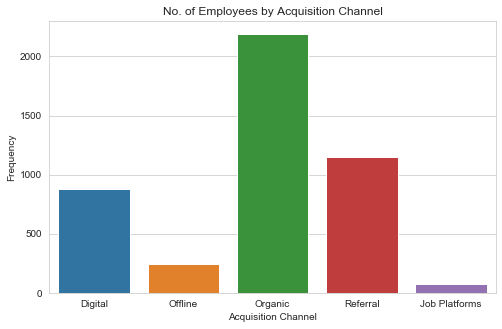

In [48]:
# Set the width and height of the figure
plt.figure(figsize=(8,5))

# Plot style
sns.set_style("whitegrid")

# Add title
plt.title("No. of Employees by Acquisition Channel")

# Bar chart showing 
sns_plot_4_2 = sns.countplot(df['ACQUISITION_CHANNEL'])

# Add labels for axes
plt.xlabel("Acquisition Channel")
plt.ylabel("Frequency")

# Save plot
fig_4_2 = sns_plot_4_2.get_figure()
fig_4_2.savefig("./figures/4_2.png") 

In [49]:
print(df['ACQUISITION_CHANNEL'].describe())

count        4541
unique          5
top       Organic
freq         2190
Name: ACQUISITION_CHANNEL, dtype: object


In [50]:
print(df.groupby('ACQUISITION_CHANNEL')[['EMPLOYEE_ID']].count())

                     EMPLOYEE_ID
ACQUISITION_CHANNEL             
Digital                      882
Job Platforms                 77
Offline                      242
Organic                     2190
Referral                    1150


#### Analysis
The data shows that of the 4,541 total employees in the dataset, 1,150 joined Gig Deliveries through the Referral channel, making up just over a quarter (25.3%) of the total workforce. This is the second most popular Acquisition Channel after Organic, which makes up 2,190 of the employee in the dataset (48.2%).

The key thing to notice here is that even though the Referral scheme is the second best Acquisition Measure, it is actually the best performing channel in which Gig Deliveries is actively involved in when driving recruitment. Half of the employees in the dataset came are said to have come to Gig Deliveries Organically which presumably means that Gig Deliveries had no active participation in finding the employees before their application.

When comparing channel to Job Platforms, presumably sites like [LinkedIn](https://uk.linkedin.com), [Indeed](https://www.indeed.co.uk), [Monster](https://www.monster.co.uk), [Reed](https://www.reed.co.uk/) etc., this channel recruited only 77 employees (1.70% of the employees in the dataset). The next best Acquisition Channel is Digital, making up a considerable number of the employees with 882 (19.4% of the dataset). Offline makes up the remaining 242 employees (5.33%).

Considering quarter of the employees came to Gig Deliveries through Referrals and it is the best performing active measure, I would say I would say that the ERP scheme is performing very well and is a key component for Gig Deliveries maintaining its staff and high performance levels regarding the delivery of the food.

<a id='section4.3'></a>

### 4.3. How does employee performance / behaviour vary between the channels?

#### Wrangle the data
For this section, before we can make any plots, we need to wrangle the data to a form that's more suited to our needs. We need to take the existing DataFrame of employee data for the 24th week, `df`, and use the [groupby](https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.core.groupby.DataFrameGroupBy.agg.html) and [aggregate](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.aggregate.html) methods to create a new DataFrame, `df_channel`, that counts the number of employees in each channel by unique employee id and the total sum for key performance metrics, defined below.

For this exercise, the first performance metrics are: Hours Worked, Cumulative Orders Delivered, Orders Delivered Cumulative, and Cumulative Throughput. We will also next look at Cummulative Referrals, and Cumulative Successful Referrals to see the 'performance' of the employees regarding the referring new candidates to the business.

Using this new DataFrame, we can produce calibrated metrics (discussed further in next steps) taking averages per employee and use these create plots that determine the performance and behaviour of the employees by channel.

The code for this is as follows:

In [51]:
# Created groupedby DataFrame, by channel
df_channel = df.groupby(
   ['ACQUISITION_CHANNEL']
).agg(
    {
         'EMPLOYEE_ID': 'count',                     # the total number of employee
         'HOURS_WORKED_CUMULATIVE': 'sum',           # the sum total of cumulative hours worked
         'ORDERS_DELIVERED_CUMULATIVE': 'sum',       # the sum total of cumulative delivered orders
         'THROUGHPUT_CUMULATIVE': 'sum',             # the sum total of cumulative throughput
         'REFERRALS_CUMULATIVE': 'sum',              # the sum total of cumulative referrals
         'SUCCESSFUL_REFERRALS_CUMULATIVE': 'sum'    # the sum total of cumulative successful referrals
    }
).reset_index()

# Rename the EMPLOYEE_ID column to TOTAL_EMPLOYEES
df_channel = df_channel.rename(columns={'EMPLOYEE_ID':'TOTAL_EMPLOYEES'})

df_channel

,ACQUISITION_CHANNEL,TOTAL_EMPLOYEES,HOURS_WORKED_CUMULATIVE,ORDERS_DELIVERED_CUMULATIVE,THROUGHPUT_CUMULATIVE,REFERRALS_CUMULATIVE,SUCCESSFUL_REFERRALS_CUMULATIVE
0,Digital,882,140313.938052,292481.0,1625.277691,533.0,75.0
1,Job Platforms,77,14923.873923,32032.0,139.768841,6.0,3.0
2,Offline,242,37820.421062,79032.0,434.241888,113.0,17.0
3,Organic,2190,407886.645300,924513.0,4453.435329,962.0,193.0
4,Referral,1150,297400.045266,639110.0,2231.928393,981.0,275.0


In [52]:
df_channel.dtypes

ACQUISITION_CHANNEL                 object
TOTAL_EMPLOYEES                      int64
HOURS_WORKED_CUMULATIVE            float64
ORDERS_DELIVERED_CUMULATIVE        float64
THROUGHPUT_CUMULATIVE              float64
REFERRALS_CUMULATIVE               float64
SUCCESSFUL_REFERRALS_CUMULATIVE    float64
dtype: object

As previously discussed in [Section 4.2](#section4.2) and again in the grouped table, `df_channel`, we have different numbers of employees for each of the Acquisition Channels. We will therefore calibrate the metrics in question regarding performance, these being: `HOURS_WORKED_CUMULATIVE`, `ORDERS_DELIVERED_CUMULATIVE`, `THROUGHPUT_CUMULATIVE`, `REFERRALS_CUMULATIVE`, and `SUCCESSFUL_REFERRALS_CUMULATIVE`. These will be calibrated by taken an average per employee i.e. dividing the sum total by the number of employees. These new metrics can be identified with the suffix '\_PE' (per employee) e.g. `HOURS_WORKED_CUMULATIVE_PE` is the cumulative hours worked per employee.

In [53]:
# Create per Employee (PR) columns
df_channel['HOURS_WORKED_CUMULATIVE_PE'] = df_channel['HOURS_WORKED_CUMULATIVE'] / df_channel['TOTAL_EMPLOYEES']
df_channel['ORDERS_DELIVERED_CUMULATIVE_PE'] = df_channel['ORDERS_DELIVERED_CUMULATIVE'] / df_channel['TOTAL_EMPLOYEES']
df_channel['THROUGHPUT_CUMULATIVE_PE'] = df_channel['THROUGHPUT_CUMULATIVE'] / df_channel['TOTAL_EMPLOYEES']
df_channel['REFERRALS_CUMULATIVE_PE'] = df_channel['REFERRALS_CUMULATIVE'] / df_channel['TOTAL_EMPLOYEES']
df_channel['SUCCESSFUL_REFERRALS_CUMULATIVE_PE'] = df_channel['SUCCESSFUL_REFERRALS_CUMULATIVE'] / df_channel['TOTAL_EMPLOYEES']

# Drop unnamed channel (created 2nd index)
df_channel = df_channel.loc[:, ~df_channel.columns.str.contains('^Unnamed')]

In [54]:
df_channel.head()

,ACQUISITION_CHANNEL,TOTAL_EMPLOYEES,HOURS_WORKED_CUMULATIVE,ORDERS_DELIVERED_CUMULATIVE,THROUGHPUT_CUMULATIVE,REFERRALS_CUMULATIVE,SUCCESSFUL_REFERRALS_CUMULATIVE,HOURS_WORKED_CUMULATIVE_PE,ORDERS_DELIVERED_CUMULATIVE_PE,THROUGHPUT_CUMULATIVE_PE,REFERRALS_CUMULATIVE_PE,SUCCESSFUL_REFERRALS_CUMULATIVE_PE
0,Digital,882,140313.938052,292481.0,1625.277691,533.0,75.0,159.086098,331.611111,1.842718,0.604308,0.085034
1,Job Platforms,77,14923.873923,32032.0,139.768841,6.0,3.0,193.816544,416.000000,1.815180,0.077922,0.038961
2,Offline,242,37820.421062,79032.0,434.241888,113.0,17.0,156.282732,326.578512,1.794388,0.466942,0.070248
3,Organic,2190,407886.645300,924513.0,4453.435329,962.0,193.0,186.249610,422.152055,2.033532,0.439269,0.088128
4,Referral,1150,297400.045266,639110.0,2231.928393,981.0,275.0,258.608735,555.747826,1.940807,0.853043,0.239130


You can now see the new DataFrame with the new per employee metrics, including `HOURS_WORKED_CUMULATIVE_PE`, `ORDERS_DELIVERED_CUMULATIVE_PE`, `THROUGHPUT_CUMULATIVE_PE`, `REFERRALS_CUMULATIVE_PE`, `SUCCESSFUL_REFERRALS_CUMULATIVE_PE`, and `ORDERS_DELIVERED_PER_HOUR_PE`.

Before plotting this data, let's export the grouped and aggregated dataset in case we, or other analysts, would like to use it in future projects/analysis.

In [55]:
df_channel.to_csv(r'./data/erp_dataset_grouped.csv')

#### Plot the data

##### Plot 1: Average No. of Hours Worked per Employee by Acquisition Channel after 24 weeks

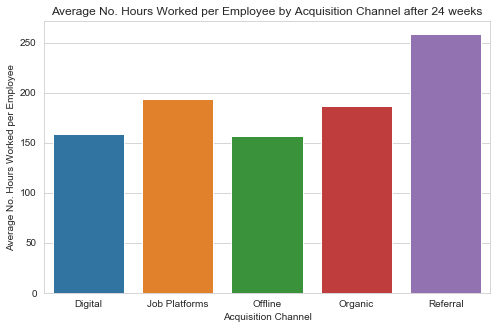

In [56]:
# Set the width and height of the figure
plt.figure(figsize=(8,5))

# Plot style
sns.set_style("whitegrid")

# Add title
plt.title("Average No. Hours Worked per Employee by Acquisition Channel after 24 weeks")

# Bar chart showing the Average No. Hours Worked per Employee by Acquisition Channel after 24 weeks
sns_plot_4_3a = sns.barplot(x=df_channel['ACQUISITION_CHANNEL'], y=df_channel['HOURS_WORKED_CUMULATIVE_PE'])

# Add labels for axes
plt.xlabel("Acquisition Channel")
plt.ylabel("Average No. Hours Worked per Employee")

# Save plot
fig_4_3a = sns_plot_4_3a.get_figure()
fig_4_3a.savefig("./figures/4_3a.png") 

##### Plot 2: Average No. of Orders Delivered per Employee by Acquisition Channel after 24 weeks

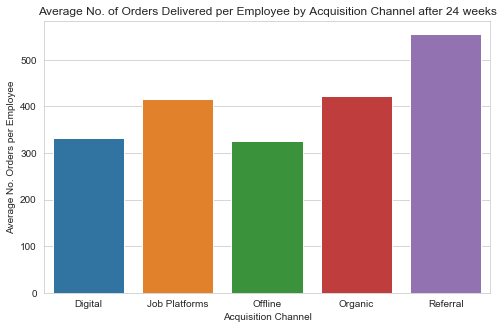

In [57]:
# Set the width and height of the figure
plt.figure(figsize=(8,5))

# Plot style
sns.set_style("whitegrid")

# Add title
plt.title("Average No. of Orders Delivered per Employee by Acquisition Channel after 24 weeks")

# Bar chart showing the Average No. of Orders Delivered per Employee by Acquisition Channel after 24 weeks
sns_plot_4_3b = sns.barplot(x=df_channel['ACQUISITION_CHANNEL'], y=df_channel['ORDERS_DELIVERED_CUMULATIVE_PE'])

# Add labels for axes
plt.xlabel("Acquisition Channel")
plt.ylabel("Average No. Orders per Employee")

# Save plot
fig_4_3b = sns_plot_4_3b.get_figure()
fig_4_3b.savefig("./figures/4_3b.png") 

##### Plot 3: Average Throughput per Employee by Acquisition Channel after 24 weeks

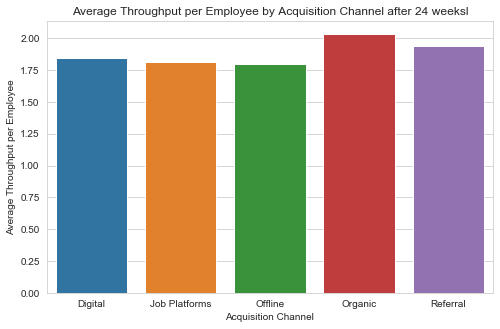

In [58]:
# Set the width and height of the figure
plt.figure(figsize=(8,5))

# Plot style
sns.set_style("whitegrid")

# Add title
plt.title("Average Throughput per Employee by Acquisition Channel after 24 weeksl")

# Bar chart showing the Average Throughput per Employee by Acquisition Channel after 24 weeks
sns_plot_4_3c = sns.barplot(x=df_channel['ACQUISITION_CHANNEL'], y=df_channel['THROUGHPUT_CUMULATIVE_PE'])

# Add labels for axes
plt.xlabel("Acquisition Channel")
plt.ylabel("Average Throughput per Employee")

# Save plot
fig_4_3c = sns_plot_4_3c.get_figure()
fig_4_3c.savefig("./figures/4_3c.png") 

##### Plot 4: Average No. of Referrals per Employee by Acquisition Channel after 24 weeks

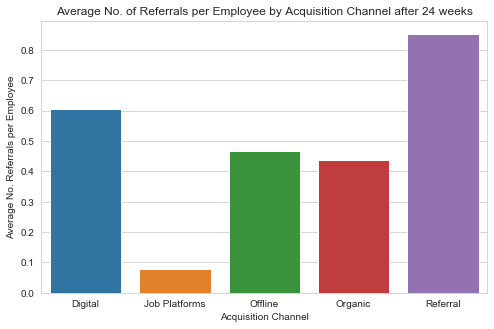

In [59]:
# Set the width and height of the figure
plt.figure(figsize=(8,5))

# Plot style
sns.set_style("whitegrid")

# Add title
plt.title("Average No. of Referrals per Employee by Acquisition Channel after 24 weeks")

# Bar chart showing the Average No. of Referrals per Employee by Acquisition Channel after 24 weeks
sns_plot_4_3d = sns.barplot(x=df_channel['ACQUISITION_CHANNEL'], y=df_channel['REFERRALS_CUMULATIVE_PE'])

# Add labels for axes
plt.xlabel("Acquisition Channel")
plt.ylabel("Average No. Referrals per Employee")

# Save plot
fig_4_3d = sns_plot_4_3d.get_figure()
fig_4_3d.savefig("./figures/4_3d.png") 

##### Plot 5: Average No. of Successful Referrals per Employee by Acquisition Channel after 24 weeks

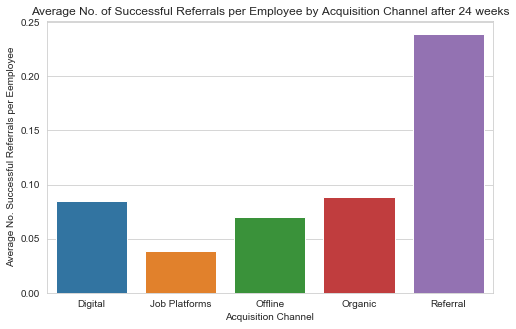

In [60]:
# Set the width and height of the figure
plt.figure(figsize=(8,5))

# Plot style
sns.set_style("whitegrid")

# Add title
plt.title("Average No. of Successful Referrals per Employee by Acquisition Channel after 24 weeks")

# Bar chart showing the Average No. of Successful Referrals per Employee by Acquisition Channel after 24 weeks
sns_plot_4_3e = sns.barplot(x=df_channel['ACQUISITION_CHANNEL'], y=df_channel['SUCCESSFUL_REFERRALS_CUMULATIVE_PE'])

# Add labels for axes
plt.xlabel("Acquisition Channel")
plt.ylabel("Average No. Successful Referrals per Eemployee")

# Save plot
fig_4_3e = sns_plot_4_3e.get_figure()
fig_4_3e.savefig("./figures/4_3e.png") 

#### Analysis
All analysis focuses on the Referral Acquisition Channel, comparing this to the other channels. Each of the five previous plots has a written paragraph, interpreting the results.

##### Plot 1: Average No. of Hours Worked per Employee by Acquisition Channel
For the first plot, the Average No. of Hours Worked per employee by Acquisition Channel, the data shows that employees who joined Gig Deliveries by Referral came out on top, with an average no. of 258.6 total hours worked per employee after 24 weeks, averaging at 10.8 hours a week. For reference, employees work on average 15 hours a week in the UK [(source)](https://roocommunity.com/tech-round-up-statistics/). Of the total Hours Worked by all employees in the dataset, this makes up 27.1% of total Hours Worked, suggesting that the Referral employees are the hardest working and most committed demographic. The four other platform's share of the total percentage ranges between 16.7% and 20.3%, the next best channel being by Job Platform, with an average hours worked of 193.8 (20.3%).

##### Plot 2: Average No. of Orders Delivered per Employee by Acquisition Channel
For the second plot, the Average No. of Orders Delivered per employee by Acquisition Channel, the data shows that employees who joined Gig Deliveries by Referral came out on top again, with an average no. of 555.7 orders delivered per employee after 24 weeks. Of the total Orders Delivered by all employees in the dataset, this makes up 27.1% of the total Orders Delivered, suggesting that the Referral employees are the most productive demographic. The four other platform's share of the total percentage ranges between 15.9% and 20.6%, the next best channel being the Organic joiners, with an average Orders Delivered of 422.0 (20.6%).

##### Plot 3: Throughput per Employee by Acquisition Channel
As a quick reminder before discussing the third plot, the Cumlative Throughput is the cumulative orders per hour (orders / hours) of the employee.

As we can see from the data, the Average Throughput per employee by Acquisition Channel of employees who joined Gig Deliveries by Referral again came out very strongly, overall placing second with an average Throughput per employee of 2.03. Of the total sum of Throughput per employee in the dataset, this makes up 20.6%, suggesting that the Referral employees are the some of the most product employees and are very efficient in delivering the most orders per hour, as possible. The other platform's share of the total percentage are all very close, ranging between 19.0% (Offline) and 21.6% (Organic).

My instinct with this observation is that the Vehicle Type may be a more interesting indicator to use when looking at the Throughput of the employees. However, I believe it's interesting analysis and has some value being in this report.

##### Plot 4: Average No. of Referrals per Employee by Acquisition Channel
For the forth plot, the Average No. of Referrals per employee by Acquisition Channel, the data shows that employees who joined Gig Deliveries by Referral came out on top again, with an average no. of 0.853 Referrals per employee after 24 weeks. Of the total Referrals by all employees in the dataset, this makes up 34.9% of the total Referrals, suggesting that the Referral employees are far more likely to Refer new employees to the company. The four other platform's share of the total percentage ranges between 3.19% (Job Platforms) and 24.8% (Digital).


##### Plot 5: Average No. of Successful Referrals per Employee by Acquisition Channel
For the fifth plot, the Average No. of Successful Referrals per employee by Acquisition Channel, the data shows that employees who joined Gig Deliveries by Referral continued to observe the previous trends, again leading the channels with an average no. of 0.239 Successful per employee after 24 weeks. Of the total Successful Referrals by all employees in the dataset, this makes up 45.9% of the total Successful Referrals, suggesting that not only are the Referral employees are far more likely to Refer other employees to the company (as seen in plot 4), but they are also far more likely to refer successful candidates. The four other platform's share of the total percentage ranges between 7.47% (Job Platforms) and 16.9% (Organic).

<a id='section5'></a>

## 5. Summary and Conclusion

To answer the question “Is the ERP scheme successful and why?" using our limited dataset and restricted time for analysis, I believe that the answer is a resounding Yes! 

Our analysis was divided into three sections: 1) We defined what a successful ERP scheme is; 2) We looked at how the ERP scheme performed compared with other channels; and 3) We analysed how employee's performance and behaviour depending on their channel of recruitment.

We first looked at the 4,541 employees and took a high level view to see through which channel they had come through to the company. The data showed that 1,150 employees joined Gig Deliveries through the Referral channel, making up just over a quarter (25.3%) of the workforce in the dataset, second only to Organic (48.2%), a demographic which is inherently our of Gig Deliveries's control. This therefore suggests that Referrals is Gig Deliveries's best active form of recruitment.

We next took our DataFrame and calibrated the key performance metrics of the employees to determine average 'per employeer' values over the 24 week period for: Hours Worked, Orders Delivered, Orders Delivered, Throughput, Referrals, and Successful Referrals. Our plots show that in all but one of the categories, Referred employees outperform other employees in regarding these metrics, except for Throughput where Referrals placed second and as discussed in section 4.3, all channels performed quite simularly and I have suspicious that it's the form of transport that would have greater effect on improving this number i.e. using a car and not a bike.

To conclude, not only is 'Employee Referral Programme' scheme a great way for Gig Deliveries to find new employees, the data suggests that these employees are some of the most productive, hardest working and efficient employees in the business. The data also suggests that employees who joined the business through the Referral scheme are more likely to go on to refer more future employees and with a greater success rate.

<a id='section6'></a>

## 6. Next Steps

This workbook was a short exploratory data analysis for Gig Deliveries employees.

Some of the metrics and avenues not touched but may be of interest include:
*    Further address our definition of success using additional data of employees including the turnover rate of employee, the average length of employement of employees with the company, for example.
*    Further analysis of the employee's `VEHICLE_TYPE`, especially when considering it's effect on `THROUGHPUT` i.e. do car drivers deliver more orders per hours than cyclists.
*    Further analysis of the employee `LOCATION`. We could maybe create a heatmap of Location vs. Aquisition Channel and see the hot spots.
*    Further analysis of the employee's `EMPLOYEE_ACTIVITY` i.e. TRUE or FALSE. Does further inspection show any patterns?

<a id='section7'></a>

## 7. Bibliography
1.    [https://www.businessinsider.com/uber-lyft-drivers-livable-wage-complaints-2019-5?r=US&IR=T](https://www.businessinsider.com/uber-lyft-drivers-livable-wage-complaints-2019-5?r=US&IR=T)
2.    [https://www.td.org/insights/has-the-gig-economy-jumped-the-shark](https://www.td.org/insights/has-the-gig-economy-jumped-the-shark)
3.    [https://roocommunity.com/tech-round-up-statistics/](https://roocommunity.com/tech-round-up-statistics/)

***Visit my website [EddWebster.com](https://www.eddwebster.com) or my [GitHub Repository](https://github.com/eddwebster) for more projects. If you'd like to get in contact, my email is: edd.j.webster@gmail.com.***

[Back to the top](#top)